In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
oscar_original = pd.read_csv('Oscar_2000_2018.csv')

In [4]:
oscar_copy = oscar_original.copy()

In [5]:
oscar_copy.head()

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0


In [6]:
oscar_copy.describe()

,year,duration,rate,metascore,votes,gross,user_reviews,critic_reviews,popularity,awards_wins,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
count,1235.000000,1235.000000,1235.000000,1206.000000,1.235000e+03,1.193000e+03,1221.000000,1225.000000,1100.000000,1235.000000,...,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2008.602429,115.082591,7.066397,64.165837,1.868612e+05,8.688069e+07,568.193284,265.664490,1270.490909,2.980567,...,0.168421,0.325506,0.148178,0.308502,0.184615,0.335223,2008.570954,6.777593,16.034025,4.688797
std,5.292865,22.249134,0.822474,16.989839,1.905188e+05,1.046271e+08,578.088225,146.452956,1026.061367,6.344483,...,0.590970,0.899823,0.515469,0.831638,0.576349,0.896245,5.147749,3.691644,8.314000,0.764831
min,2000.000000,7.000000,2.400000,9.000000,3.000000e+01,1.207000e+03,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,1.000000,1.000000
25%,2004.000000,101.000000,6.600000,52.000000,6.018000e+04,1.542000e+07,214.000000,160.000000,489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,3.000000,9.000000,5.000000
50%,2009.000000,114.000000,7.200000,66.000000,1.339110e+05,5.206600e+07,403.000000,237.000000,1063.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,7.000000,16.000000,5.000000
75%,2013.000000,128.000000,7.650000,78.000000,2.570945e+05,1.201474e+08,708.000000,350.000000,1763.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,23.000000,5.000000
max,2018.000000,224.000000,9.000000,100.000000,1.743331e+06,9.366300e+08,5078.000000,816.000000,4937.000000,49.000000,...,5.000000,6.000000,5.000000,6.000000,5.000000,7.000000,2018.000000,12.000000,31.000000,7.000000


In [7]:
oscar_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.1+ MB


In [8]:
oscar_copy = oscar_copy.drop_duplicates(keep = 'first')

# Part 1 EDA

# Question 1 - Using a scatterplot or a pair plot show the relationship between features “user_reviews” and “critic_reviews”. Find the Pearson's correlation coefficient(r) between the 2 features.

In [9]:
reviews = oscar_copy[["user_reviews","critic_reviews"]]

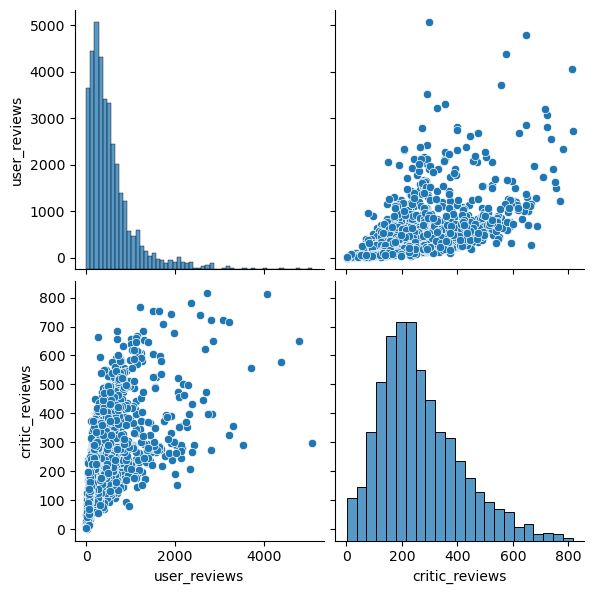

In [10]:
sns.pairplot(reviews,height=3)

# Plot the average “duration” per “certificate” feature. In other words, x-axis would be “certificate” and the y-axes would be the average duration.

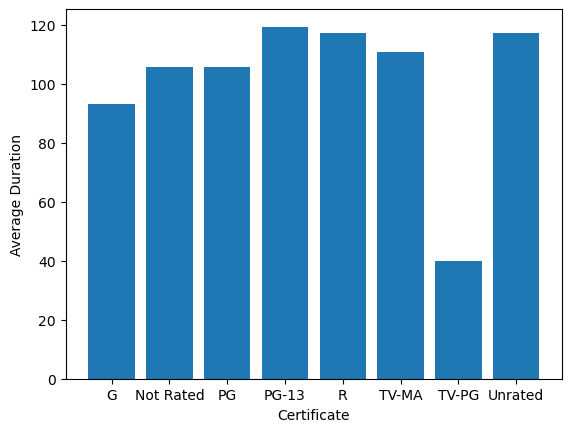

In [10]:
# group the data by certificate and calculate the mean duration
avg_duration = oscar_copy.groupby('certificate')['duration'].mean()

# create a bar plot
plt.bar(avg_duration.index, avg_duration.values)

# set the labels for x and y axes
plt.xlabel('Certificate')
plt.ylabel('Average Duration')

# show the plot
plt.show()

# Plot a histogram for the “genre” feature. Note that the field “genre” needs to be split first to find the frequency for each individual genre type; “Comedy”, “Romance”, “Action” etc. (Hint: Functions like “strsplit” in R or “split” in Python can be used)

In [11]:
# split the genres and create a list of all genres
genres = []
for row in oscar_copy['genre']:
    genres.extend(row.split('|'))

# count the frequency of each genre
genre_count = pd.Series(genres).value_counts()

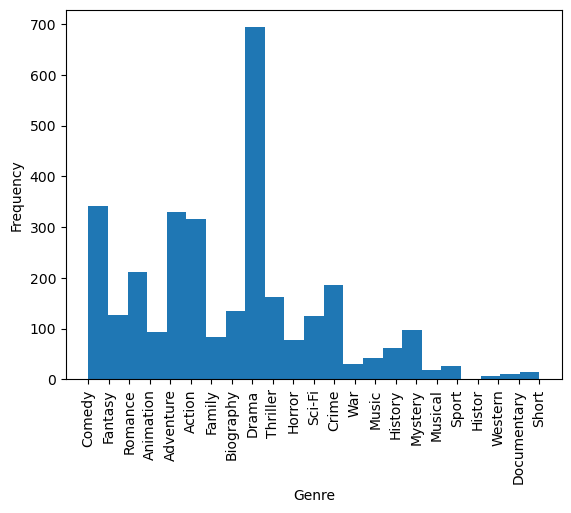

In [12]:
# create a histogram
plt.hist(genres, bins=len(genre_count))

# set the labels for x and y axes
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

# Part 2 Model Building

# You are going to predict “Oscar_Best_Picture_won” feature; this will be your target variable. Remove all of the features which has the convention “Oscar_Best_XXX_won” except for the target variable “Oscar_Best_Picture_won”.

In [13]:
oscar_copy.columns

Index(['year', 'movie', 'movie_id', 'certificate', 'duration', 'genre', 'rate',
       'metascore', 'synopsis', 'votes',
       ...
       'New_York_Film_Critics_Circle_nominated',
       'New_York_Film_Critics_Circle_nominated_categories',
       'Los_Angeles_Film_Critics_Association_won',
       'Los_Angeles_Film_Critics_Association_won_categories',
       'Los_Angeles_Film_Critics_Association_nominated',
       'Los_Angeles_Film_Critics_Association_nominated_categories',
       'release_date.year', 'release_date.month', 'release_date.day-of-month',
       'release_date.day-of-week'],
      dtype='object', length=119)

In [14]:
features_to_remove = [col for col in oscar_copy.columns if 'Oscar_Best_' in col and col != 'Oscar_Best_Picture_won']
oscar_copy.drop(features_to_remove, axis=1, inplace=True)

# Convert the target variable’s type to a numerical type by doing the transformation,“Yes” = 1, “No” = 0.

In [15]:
oscar_copy['Oscar_Best_Picture_won']

0       No
1       No
2       No
3       No
4       No
        ..
1230    No
1231    No
1232    No
1233    No
1234    No
Name: Oscar_Best_Picture_won, Length: 1235, dtype: object

In [16]:
oscar_copy["Oscar_Best_Picture_won"] = oscar_copy["Oscar_Best_Picture_won"].map({"Yes": 1, "No": 0})

In [17]:
len(oscar_copy["Oscar_Best_Picture_won"].value_counts()[:,])

2

In [18]:
problem_rows = []

n = oscar_copy.shape[0]

# Remove columns with high cardinality, i.e., for every column that has a unique value frequency of 70% or higher, remove them from the dataset. 

In [19]:
for column in oscar_copy.columns:
    unique = len(oscar_copy["Oscar_Best_Picture_won"].value_counts()[:,])
    cardinality = (unique/n)*100
    if(cardinality >= 70):
        oscar_copy.drop(column, axis=1, inplace=True)

# Preprocessing the Data

In [20]:
oscar_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Columns: 104 entries, year to release_date.day-of-week
dtypes: float64(10), int64(47), object(47)
memory usage: 1013.1+ KB


In [21]:
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class
imputer_numerical = SimpleImputer(strategy='mean')
imputer_float = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

In [22]:
# Splitting data by separating the int, float and object columns

oscar_copy_numerical = oscar_copy.select_dtypes(include='int64')
num_columns = oscar_copy.select_dtypes(include='int64').columns
oscar_copy_float = oscar_copy.select_dtypes(include='float64')
float_columns = oscar_copy.select_dtypes(include='float64').columns
oscar_copy_categorical = oscar_copy.select_dtypes(include='object')
categorical_columns = oscar_copy.select_dtypes(include='object').columns

In [23]:
# Performing Imputations on the separate data

imputer_numerical.fit(oscar_copy_numerical)
imputer_float.fit(oscar_copy_float)
imputer_categorical.fit(oscar_copy_categorical)

SimpleImputer(strategy='most_frequent')

In [24]:
oscar_copy_numerical = pd.DataFrame(imputer_numerical.transform(oscar_copy_numerical),columns = num_columns)
oscar_copy_float = pd.DataFrame(imputer_float.transform(oscar_copy_float), columns = float_columns).astype('float32')
oscar_copy_categorical = pd.DataFrame(imputer_categorical.transform(oscar_copy_categorical), columns = categorical_columns)

In [25]:
# Creating an instance of the Label Encoder for the Categorical Data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [26]:
# Performing Label Encoding on the Categorical Data

oscar_copy_categorical = oscar_copy_categorical.apply(LabelEncoder().fit_transform)

In [27]:
# Merging the Preprocessed Data

new_oscar = pd.concat([oscar_copy_numerical,oscar_copy_float,oscar_copy_categorical], axis = 1)

In [28]:
new_oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Columns: 104 entries, year to Los_Angeles_Film_Critics_Association_nominated_categories
dtypes: float32(10), float64(47), int32(47)
memory usage: 728.6 KB


# . Perform a time split and create a training dataset spanning the period 2000-2017 and a test dataset for the movies released in 2018 - use “year” feature for the data split

In [29]:
train_index = np.where(np.array(new_oscar['release_date.year']) < 2018)[0]

In [30]:
train = new_oscar.iloc[train_index,:]

In [31]:
test_index = np.where(np.array(new_oscar['release_date.year']) == 2018)[0]

In [32]:
test = new_oscar.iloc[test_index,:]

In [33]:
train.shape

(1201, 104)

In [34]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]

In [35]:
train_x.head()

,year,duration,votes,awards_wins,awards_nominations,Oscar_Best_Picture_won,Oscar_nominated,Golden_Globes_won,Golden_Globes_nominated,BAFTA_won,...,Hollywood_Film_nominated_categories,Austin_Film_Critics_Association_won_categories,Austin_Film_Critics_Association_nominated_categories,Denver_Film_Critics_Society_won_categories,Denver_Film_Critics_Society_nominated_categories,Boston_Society_of_Film_Critics_won_categories,Boston_Society_of_Film_Critics_nominated_categories,New_York_Film_Critics_Circle_won_categories,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won_categories
0,2001.0,118.0,66660.0,1.0,4.0,0.0,1.0,1.0,2.0,0.0,...,4,6,41,1,39,8,74,13,19,12
1,2000.0,84.0,144475.0,5.0,11.0,0.0,0.0,0.0,1.0,0.0,...,4,6,41,1,39,8,74,13,19,12
2,2005.0,106.0,273203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,6,41,1,39,8,74,13,19,12
3,2002.0,123.0,63852.0,2.0,12.0,0.0,6.0,1.0,2.0,1.0,...,4,6,41,1,39,8,74,13,19,12
4,2001.0,178.0,1286275.0,26.0,67.0,0.0,13.0,0.0,4.0,5.0,...,4,6,60,1,39,8,26,13,19,25


In [36]:
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [37]:
test.shape

(34, 104)

# Create a tree-based model to predict the target “Oscar_Best_Picture_won”

In [38]:
from sklearn import tree

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

# Use the model to predict the test dataset and find the maximum predicted value

In [40]:
pred_y = clf.predict(test_x)

In [41]:
pred_y

array([81, 20, 20, 20, 75, 20, 20, 20, 20, 20, 20, 81, 20, 20, 76, 20, 20,
       20, 90, 20,  0, 20, 20, 20, 20, 20, 20, 20,  6, 20, 20, 20, 20, 20])

In [42]:
test_y

772     47
880     20
938     20
946     20
968     68
1037    20
1136    20
1147    20
1159    20
1161    20
1172    20
1173    75
1174    20
1183    20
1185    16
1186    20
1190    20
1192    20
1193    40
1199    20
1201     0
1203    20
1204    20
1205    20
1206    20
1209    20
1212    20
1215    20
1217    93
1219    20
1220    20
1231    20
1233    20
1234    20
Name: Los_Angeles_Film_Critics_Association_nominated_categories, dtype: int32

In [43]:
pred_data = pd.DataFrame(pred_y)

In [45]:
pred_data[0].value_counts()

20    27
81     2
75     1
76     1
90     1
0      1
6      1
Name: 0, dtype: int64

# 20 is the most predicted value as per the Decision Tree Model